In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = './tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()

base_dir = './tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [3]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 - 87s - loss: 0.6900 - acc: 0.5275 - val_loss: 0.6783 - val_acc: 0.5170
Epoch 2/100
100/100 - 82s - loss: 0.6573 - acc: 0.6135 - val_loss: 0.6407 - val_acc: 0.6360
Epoch 3/100
100/100 - 76s - loss: 0.6035 - acc: 0.6795 - val_loss: 0.5989 - val_acc: 0.6920
Epoch 4/100
100/100 - 70s - loss: 0.5642 - acc: 0.7065 - val_loss: 0.6002 - val_acc: 0.6710
Epoch 5/100
100/100 - 82s - loss: 0.5238 - acc: 0.7325 - val_loss: 0.6930 - val_acc: 0.5980
Epoch 6/100
100/100 - 84s - loss: 0.5047 - acc: 0.7535 - val_loss: 0.5578 - val_acc: 0.7150
Epoch 7/100
100/100 - 94s - loss: 0.4654 - acc: 0.7800 - val_loss: 0.5343 - val_acc: 0.7430
Epoch 8/100
100/100 - 85s - loss: 0.4348 - acc: 0.7955 - val_loss: 0.5524 - val_acc: 0.7360
Epoch 9/100
100/100 - 86s - loss: 0.4115 - acc: 0.8190 - val_loss: 0.6371 - val_acc: 0.6820
Epoch 10/100

Epoch 86/100
100/100 - 80s - loss: 0.0057 - acc: 0.9975 - val_loss: 2.4407 - val_acc: 0.7260
Epoch 87/100
100/100 - 77s - loss: 0.0060 - acc: 0.9980 - val_loss: 2.5446 - val_acc: 0.7430
Epoch 88/100
100/100 - 75s - loss: 0.0046 - acc: 0.9995 - val_loss: 2.3971 - val_acc: 0.7300
Epoch 89/100
100/100 - 72s - loss: 0.0050 - acc: 0.9985 - val_loss: 2.6101 - val_acc: 0.7270
Epoch 90/100
100/100 - 71s - loss: 1.4427e-04 - acc: 1.0000 - val_loss: 2.5360 - val_acc: 0.7260
Epoch 91/100
100/100 - 72s - loss: 0.0068 - acc: 0.9980 - val_loss: 2.4968 - val_acc: 0.7300
Epoch 92/100
100/100 - 72s - loss: 0.0012 - acc: 0.9995 - val_loss: 2.4661 - val_acc: 0.7240
Epoch 93/100
100/100 - 72s - loss: 8.0393e-05 - acc: 1.0000 - val_loss: 2.6208 - val_acc: 0.7250
Epoch 94/100
100/100 - 72s - loss: 0.0014 - acc: 0.9995 - val_loss: 2.6288 - val_acc: 0.7430
Epoch 95/100
100/100 - 74s - loss: 0.0014 - acc: 0.9995 - val_loss: 2.7383 - val_acc: 0.7340
Epoch 96/100
100/100 - 74s - loss: 1.2419e-04 - acc: 1.0000 - 

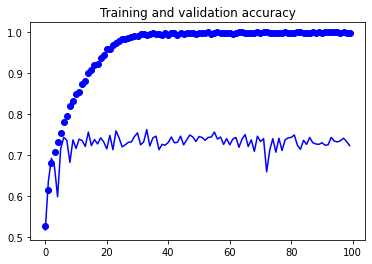

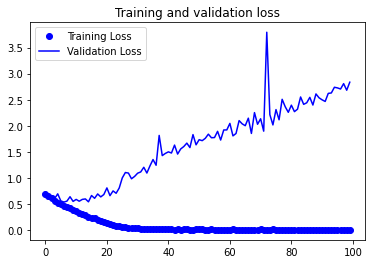

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Data Augmentation

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 104s - loss: 0.6950 - acc: 0.5050 - val_loss: 0.6866 - val_acc: 0.6310
Epoch 2/100
100/100 - 87s - loss: 0.6829 - acc: 0.5465 - val_loss: 0.6634 - val_acc: 0.6050
Epoch 3/100
100/100 - 90s - loss: 0.6698 - acc: 0.5980 - val_loss: 0.6334 - val_acc: 0.6650
Epoch 4/100
100/100 - 109s - loss: 0.6477 - acc: 0.6260 - val_loss: 0.6034 - val_acc: 0.6760
Epoch 5/100
100/100 - 92s - loss: 0.6478 - acc: 0.6170 - val_loss: 0.6101 - val_acc: 0.6440
Epoch 6/100
100/100 - 87s - loss: 0.6215 - acc: 0.6565 - val_loss: 0.5802 - val_acc: 0.6860
Epoch 7/100
100/100 - 83s - loss: 0.6206 - acc: 0.6520 - val_loss: 0.5711 - val_acc: 0.7010
Epoch 8/100
100/100 - 79s - loss: 0.6047 - acc: 0.6760 - val_loss: 0.5513 - val_acc: 0.7230
Epoch 9/100
100/100 - 84s - loss: 0.5954 - acc: 0.6840 - val_loss: 0.5880 - val_acc: 0.6760
Epoch 10/100
100/100 - 86s - loss: 0.5959 - acc: 0.6745 - val_loss: 0.5503 - val_acc: 

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()